# Heart Health Analysis
### By:  Keith D. Smith
### February 5, 2023

# Acquire Data

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

## Import Data

In [2]:
df = pd.read_csv('heart_data.csv')

# Prepare Data

In [3]:
df.__dir__()

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [5]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df["age"] = df["age"]/365
df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
df.shape

(70000, 14)

In [8]:
df[df.isnull().any(axis=1)]

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [9]:
feature_names = df.columns[2:]

In [10]:
heart_df = pd.DataFrame(df, columns = feature_names)

In [11]:
heart_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [12]:
heart_df.isnull().sum().any()

False

## Exploratory Data Analysis (EDA)

In [13]:
heart_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
heart_df["gender"].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [15]:
heart_df["cholesterol"].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [16]:
heart_df["gluc"].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [17]:
heart_df["smoke"].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [18]:
heart_df["alco"].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [19]:
heart_df["active"].value_counts()

1    56261
0    13739
Name: active, dtype: int64

In [20]:
heart_df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<AxesSubplot:xlabel='cardio', ylabel='age'>

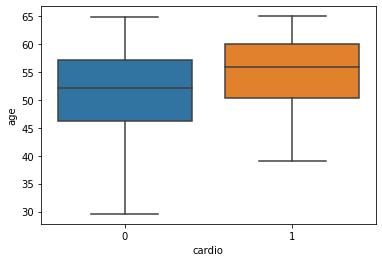

In [21]:
sns.boxplot(data=heart_df, x="cardio", y="age")

<AxesSubplot:xlabel='cardio', ylabel='height'>

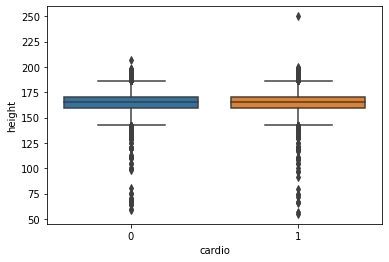

In [22]:
sns.boxplot(data=heart_df, x="cardio", y="height")

<AxesSubplot:xlabel='cardio', ylabel='weight'>

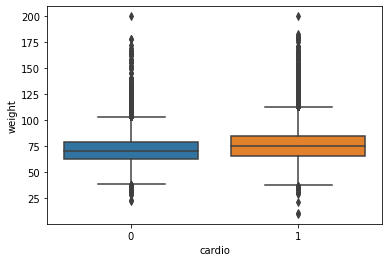

In [23]:
sns.boxplot(data=heart_df, x="cardio", y="weight")

<AxesSubplot:xlabel='cardio', ylabel='ap_hi'>

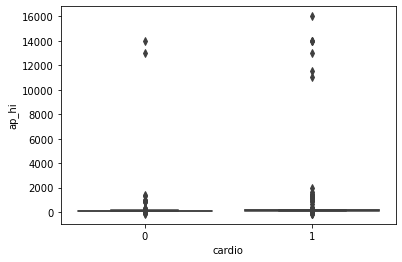

In [24]:
sns.boxplot(data=heart_df, x="cardio", y="ap_hi")

<AxesSubplot:xlabel='cardio', ylabel='ap_lo'>

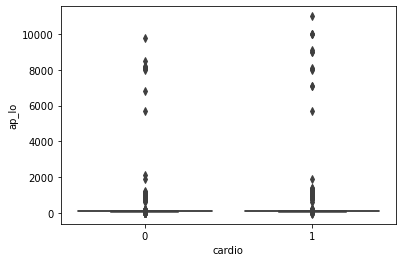

In [25]:
sns.boxplot(data=heart_df, x="cardio", y="ap_lo")

<AxesSubplot:xlabel='gender', ylabel='count'>

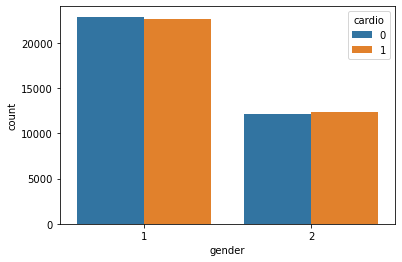

In [26]:
sns.countplot(data=heart_df, x="gender", hue="cardio")

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

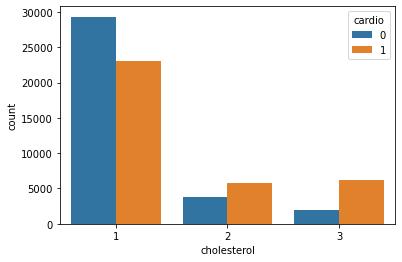

In [27]:
sns.countplot(data=heart_df, x="cholesterol", hue="cardio")

<AxesSubplot:xlabel='gluc', ylabel='count'>

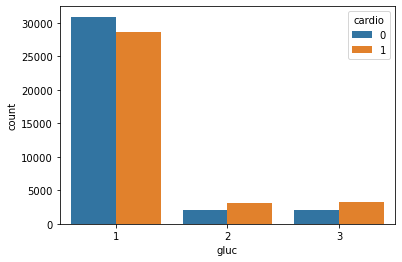

In [28]:
sns.countplot(data=heart_df, x="gluc", hue="cardio")

<AxesSubplot:xlabel='smoke', ylabel='count'>

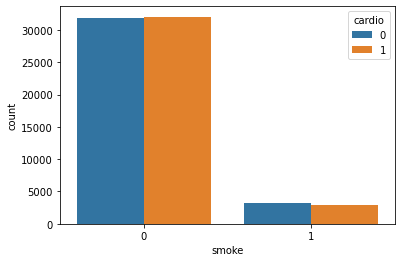

In [29]:
sns.countplot(data=heart_df, x="smoke", hue="cardio")

<AxesSubplot:xlabel='alco', ylabel='count'>

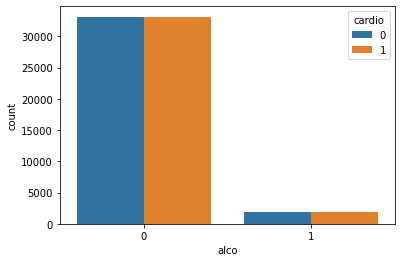

In [30]:
sns.countplot(data=heart_df, x="alco", hue="cardio")

<AxesSubplot:xlabel='active', ylabel='count'>

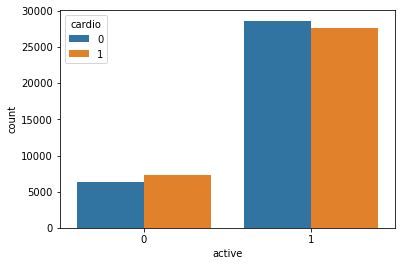

In [31]:
sns.countplot(data=heart_df, x="active", hue="cardio")

## Analyze Data

### Partition Data and Scale

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = heart_df['cardio']
X = heart_df.loc[:, heart_df.columns != 'cardio']
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=33)

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.73


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      8757
           1       0.75      0.68      0.71      8743

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



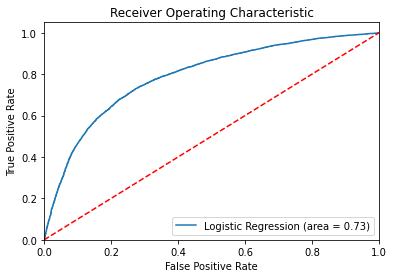

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Decision Tree

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [62]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [63]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.98%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.999619      1.000000   0.99981      0.999810       0.99981
recall         1.000000      0.999619   0.99981      0.999809       0.99981
f1-score       0.999810      0.999809   0.99981      0.999810       0.99981
support    26264.000000  26236.000000   0.99981  52500.000000   52500.00000
_______________________________________________
Confusion Matrix: 
 [[26264     0]
 [   10 26226]]

Test Result:
Accuracy Score: 63.79%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.636919     0.638988  0.637943      0.637954      0.637953
recall        0.643028     0.632849  0.637943      0.637939      0.637943
f1-score      0.639959     0.635904  0.637943      0.637932      0.637933
support  

In [64]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=0)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 72.76%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.725097      0.730165    0.7276      0.727631       0.72763
recall         0.733628      0.721566    0.7276      0.727597       0.72760
f1-score       0.729337      0.725840    0.7276      0.727589       0.72759
support    26264.000000  26236.000000    0.7276  52500.000000   52500.00000
_______________________________________________
Confusion Matrix: 
 [[19268  6996]
 [ 7305 18931]]

Test Result:
Accuracy Score: 73.55%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.731079     0.740079  0.7

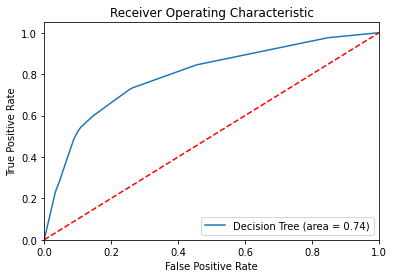

In [65]:
tree_roc_auc = roc_auc_score(y_test, tree_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### XGBoost

In [67]:
from xgboost import XGBClassifier

In [68]:
xgboost_clf = XGBClassifier()
xgboost_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [69]:
y_pred = xgboost_clf.predict(X_test)
print_score(xgboost_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgboost_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 76.81%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.747358      0.792681  0.768095      0.770020      0.770007
recall         0.810387      0.725758  0.768095      0.768073      0.768095
f1-score       0.777597      0.757745  0.768095      0.767671      0.767676
support    26264.000000  26236.000000  0.768095  52500.000000  52500.000000
_______________________________________________
Confusion Matrix: 
 [[21284  4980]
 [ 7195 19041]]

Test Result:
Accuracy Score: 73.81%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.718734     0.761211  0.738057      0.739972      0.739955
recall        0.782917     0.693126  0.738057      0.738021      0.738057
f1-score      0.749453     0.725575  0.738057      0.737514      0.737524
support  

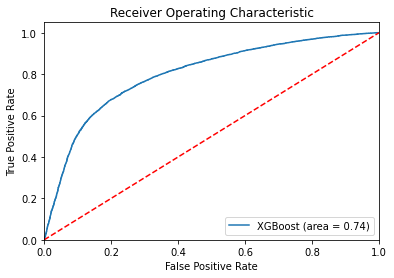

In [70]:
xgboost_roc_auc = roc_auc_score(y_test, xgboost_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgboost_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgboost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()